**Problem Statement** - The objective of this project is to build and compare multiple machine learning algorithms for the classification of round winners in the game CS:GO.

---



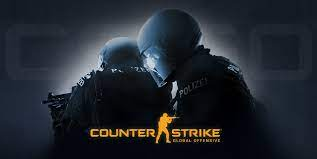


---



**Importing Basic Libraries**

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



---



## **Exploratory Data Analysis**

**About The Dataset**

The dataset consists of round snapshots from about 700 demos from high level tournament play in 2019 and 2020. Warmup rounds and restarts have been filtered, and for the remaining live rounds a round snapshot has been recorded every 20 seconds until the round is decided. Following its initial publication, It has been pre-processed and flattened to improve readability and make it easier for algorithms to process. The total number of snapshots is 122411. Snapshots are i.i.d and should be treated as individual data points, not as part of a match.

In [75]:
df = pd.read_csv('/content/drive/MyDrive/csgo_round_snapshots_new.csv')
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


In [76]:
df['round_winner'].value_counts()

T     62406
CT    60004
Name: round_winner, dtype: int64

This means that target variable is approximately balanced in the dataset.

In [77]:
df.shape

(122410, 97)

In [78]:
df.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time_left,122410.0,97.886922,54.465238,0.01,54.92,94.91,166.9175,175.0
ct_score,122410.0,6.709239,4.790362,0.00,3.00,6.00,10.0000,32.0
t_score,122410.0,6.780435,4.823543,0.00,3.00,6.00,10.0000,33.0
ct_health,122410.0,412.106568,132.293290,0.00,350.00,500.00,500.0000,500.0
t_health,122410.0,402.714500,139.919033,0.00,322.00,500.00,500.0000,600.0
...,...,...,...,...,...,...,...,...
t_grenade_incendiarygrenade,122410.0,0.019819,0.143933,0.00,0.00,0.00,0.0000,3.0
ct_grenade_molotovgrenade,122410.0,0.048011,0.227669,0.00,0.00,0.00,0.0000,3.0
t_grenade_molotovgrenade,122410.0,1.352095,1.663246,0.00,0.00,1.00,2.0000,5.0
ct_grenade_decoygrenade,122410.0,0.027694,0.169531,0.00,0.00,0.00,0.0000,3.0


In [81]:
df.describe(include = 'O').T

,count,unique,top,freq
map,122410,8,de_inferno,23811
round_winner,122410,2,T,62406


In [82]:
df.isnull().sum().sum()

0

In [83]:
df['map'].value_counts()

de_inferno     23811
de_dust2       22144
de_nuke        19025
de_mirage      18576
de_overpass    14081
de_train       13491
de_vertigo     11137
de_cache         145
Name: map, dtype: int64

Percentage of values in maps column

In [84]:
counts = df['map'].value_counts()
total = counts.sum()
percentage = (counts/total) * 100
for map_name, count, percent in zip(counts.index, counts.values, percentage.values):
  print(f'{map_name} : {percent : .2f}%', '/', count)

de_inferno :  19.45% / 23811
de_dust2 :  18.09% / 22144
de_nuke :  15.54% / 19025
de_mirage :  15.18% / 18576
de_overpass :  11.50% / 14081
de_train :  11.02% / 13491
de_vertigo :  9.10% / 11137
de_cache :  0.12% / 145


Text(0, 0.5, 'Count')

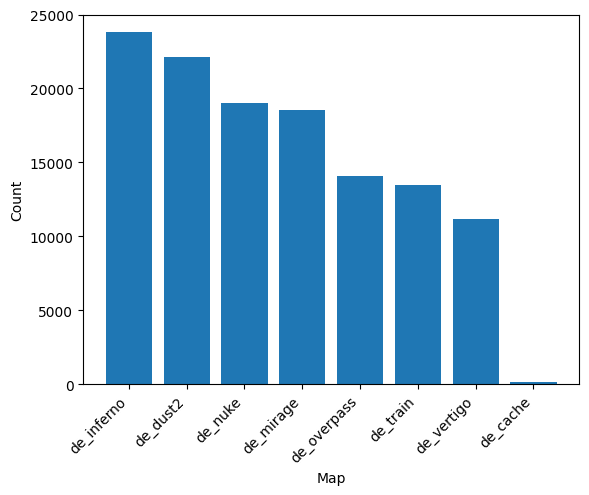

In [85]:
#plotting value_counts of map as bar plot
plt.bar(counts.index, counts.values)
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Map')
plt.ylabel('Count')

In [86]:
#getting the categorical columns from the dataset
for i in df.columns:
  if (df[i].dtype == 'object') | (df[i].dtype == 'bool'):
    print(i)

map
bomb_planted
round_winner


In [87]:
df['bomb_planted'].value_counts()

False    108726
True      13684
Name: bomb_planted, dtype: int64

## **Feature Engineering**

In [88]:
#converting categorical columns into numerical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['bomb_planted'] = le.fit_transform(df['bomb_planted'])
df['map'] = le.fit_transform(df['map'])
df['round_winner'] = le.fit_transform(df['round_winner'])

In [89]:
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122406,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122407,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,1
122408,94.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,1


In [90]:
x = df.drop('round_winner', axis = 1)
y = df['round_winner']

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.41582771, -1.40057607, -1.40570151, ..., -0.81292903,
        -0.16335636, -0.15685461],
       [ 1.06753073, -1.40057607, -1.40570151, ..., -0.81292903,
        -0.16335636, -0.15685461],
       [-0.03409385, -1.40057607, -1.40570151, ..., -0.81292903,
        -0.16335636, -0.15685461],
       ...,
       [ 0.31291789,  0.89571055,  1.70405824, ...,  2.19325316,
        -0.16335636, -0.15685461],
       [-0.0542903 ,  0.89571055,  1.70405824, ...,  1.59201672,
        -0.16335636, -0.15685461],
       [-0.4214985 ,  0.89571055,  1.70405824, ...,  0.99078028,
        -0.16335636, -0.15685461]])

In [92]:
x.shape

(122410, 96)

##**Feature Extraction (LDA)**

In [93]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [94]:
lda = LinearDiscriminantAnalysis()

# Fit LDA model
lda.fit(x, y)

LinearDiscriminantAnalysis()

In [95]:
x_lda = lda.transform(x)

In [96]:
x_lda

array([[ 0.17752282],
       [-0.25905133],
       [-0.37217156],
       ...,
       [ 0.3246216 ],
       [ 0.58978515],
       [ 1.36433115]])

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_lda, y, test_size = 0.2, random_state = 3)

##**Logistic Regression with LDA**

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [99]:
y_pred = lr.predict(x_test)

In [100]:
accuracy_score(y_test, y_pred)

0.7536149007434033

In [101]:
confusion_matrix(y_test, y_pred)

array([[8970, 2870],
       [3162, 9480]])

##**Logistic Regression without LDA**

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

In [103]:
lr = LogisticRegression()
lr.fit(x_train, y_train)


LogisticRegression()

In [104]:
y_pred = lr.predict(x_test)

In [105]:
accuracy_score(y_test, y_pred)

0.7505514255371293

## **Logistic Regression with Recursive Feature Elimination**

In [106]:
from sklearn.feature_selection import RFE
#here variables are given x1 and y1 to represent that they are made from the dataset on which LDA was NOT performed
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

In [107]:
lr1 = LogisticRegression()
rfe = RFE(lr1, n_features_to_select = 9)
rfe.fit(x1_train, y1_train)

RFE(estimator=LogisticRegression(), n_features_to_select=9)

In [108]:
rfe.ranking_

array([17, 60, 61, 21,  1,  1,  1,  1,  1,  1,  3, 66,  1, 41,  1,  1, 13,
        7, 11, 43,  4,  9, 85, 77, 74, 39, 69, 52, 14, 32, 83, 50, 29, 22,
       55, 18, 48, 87, 19, 34,  5, 26, 80, 23, 51, 38, 64, 37, 78, 65, 16,
       42, 88, 54, 59, 57, 63, 70, 86, 33, 84, 75, 72, 81, 10,  6, 20, 53,
       28, 25, 56, 82, 79, 36, 40, 67, 24, 35, 31, 46, 30, 47, 73, 45, 62,
       58, 49,  8, 27,  2, 12, 68, 71, 15, 76, 44])

In [109]:
x1_train = rfe.transform(x1_train)
x1_test = rfe.transform(x1_test)
lr1 = LogisticRegression()
lr1.fit(x1_train, y1_train)

LogisticRegression()

In [110]:
y1_pred = lr1.predict(x1_test)

In [111]:
accuracy_score(y1_test, y1_pred)

0.7434033167224899

In [112]:
confusion_matrix(y1_test, y1_pred)

array([[8503, 3337],
       [2945, 9697]])

In [113]:
#Repeating the above code by taking 3 features
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size = 0.2, random_state = 3)
lr1 = LogisticRegression()
rfe = RFE(lr1, n_features_to_select = 3)
rfe.fit(x1_train, y1_train)
x1_train = rfe.transform(x1_train)
x1_test = rfe.transform(x1_test)
lr1 = LogisticRegression()
lr1.fit(x1_train, y1_train)

LogisticRegression()

In [114]:
y1_pred = lr1.predict(x1_test)

In [115]:
accuracy_score(y1_test, y1_pred)

0.6869945265909648

In [116]:
confusion_matrix(y1_test, y1_pred)

array([[8589, 3251],
       [4412, 8230]])

In [117]:
#Repeating the above code by taking 18 features
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size = 0.2, random_state = 3)
lr1 = LogisticRegression()
rfe = RFE(lr1, n_features_to_select = 18)
rfe.fit(x1_train, y1_train)
x1_train = rfe.transform(x1_train)
x1_test = rfe.transform(x1_test)
lr1 = LogisticRegression()
lr1.fit(x1_train, y1_train)

LogisticRegression()

In [118]:
y1_pred = lr1.predict(x1_test)

In [119]:
accuracy_score(y1_test, y1_pred)

0.7471611796421861

In [120]:
confusion_matrix(y1_test, y1_pred)

array([[8849, 2991],
       [3199, 9443]])

##**Decision Tree Classifier with LDA**

In [121]:
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split(x_lda, y, test_size = 0.2, random_state = 3)
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [122]:
y_pred = dt.predict(x_test)

In [123]:
accuracy_score(y_test, y_pred)

0.703700678049179

In [124]:
confusion_matrix(y_test, y_pred)

array([[8318, 3522],
       [3732, 8910]])

##**Decision Tree Classifier with Recursive Feature Elimination**

In [125]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size = 0.2, random_state = 3)
dt1 = DecisionTreeClassifier()
rfe = RFE(dt1, n_features_to_select = 9)
rfe.fit(x1_train, y1_train)
x1_train = rfe.transform(x1_train)
x1_test = rfe.transform(x1_test)
dt1 = DecisionTreeClassifier()
dt1.fit(x1_train, y1_train)

DecisionTreeClassifier()

In [126]:
y1_pred = dt1.predict(x1_test)

In [127]:
accuracy_score(y1_test, y1_pred)

0.8003431092231027

In [128]:
confusion_matrix(y1_test, y1_pred)

array([[ 9478,  2362],
       [ 2526, 10116]])

In [129]:
#Repeating above code for 18 features
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size = 0.2, random_state = 3)
dt1 = DecisionTreeClassifier()
rfe = RFE(dt1, n_features_to_select = 18)
rfe.fit(x1_train, y1_train)
x1_train = rfe.transform(x1_train)
x1_test = rfe.transform(x1_test)
dt1 = DecisionTreeClassifier()
dt1.fit(x1_train, y1_train)

DecisionTreeClassifier()

In [130]:
y1_pred = dt1.predict(x1_test)

In [131]:
accuracy_score(y1_test, y1_pred)

0.8235846744547014

In [132]:
confusion_matrix(y1_test, y1_pred)

array([[ 9712,  2128],
       [ 2191, 10451]])

##**Decision Tree without LDA**

In [133]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [134]:
y_pred = dt.predict(x_test)

In [135]:
accuracy_score(y_test, y_pred)

0.8185197287803284

##**Random Forest Classifier with LDA**

In [136]:
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x_lda, y, test_size = 0.2, random_state = 3)
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [137]:
y_pred = rf.predict(x_test)

In [138]:
accuracy_score(y_test, y_pred)

0.7041091414100156

In [139]:
confusion_matrix(y_test, y_pred)

array([[8310, 3530],
       [3714, 8928]])

##**Random Forest Classifier without LDA**

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [141]:
y_pred = rf.predict(x_test)

In [142]:
accuracy_score(y_test, y_pred)

0.8771342210603709

In [143]:
confusion_matrix(y_test, y_pred)

array([[10513,  1327],
       [ 1681, 10961]])

##**Hyper Parameter Tuning for Random Forest**

In [144]:
rf = RandomForestClassifier(n_estimators = 300)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300)

In [145]:
y_pred = rf.predict(x_test)

In [146]:
accuracy_score(y_test, y_pred)

0.8809329303161506